In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns



In [2]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
data = pd.read_csv("delivery_time.csv")

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
x=data["Sorting Time"]
y=data["Delivery Time"]

{'whiskers': [<matplotlib.lines.Line2D at 0x7862e0450880>,
 'caps': [<matplotlib.lines.Line2D at 0x7862e0450d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7862e04505e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7862e0451270>],
 'fliers': [<matplotlib.lines.Line2D at 0x7862e0451510>],
 'means': []}

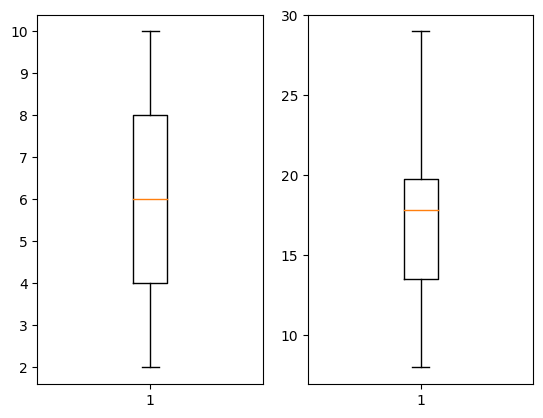

In [8]:
plt.subplot(1,2,1)
plt.style.use("default")
plt.boxplot(x)
plt.style.use("default")
plt.subplot(1,2,2)
plt.boxplot(y)

<ipython-input-9-c6c2e016c1a9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Delivery Time')

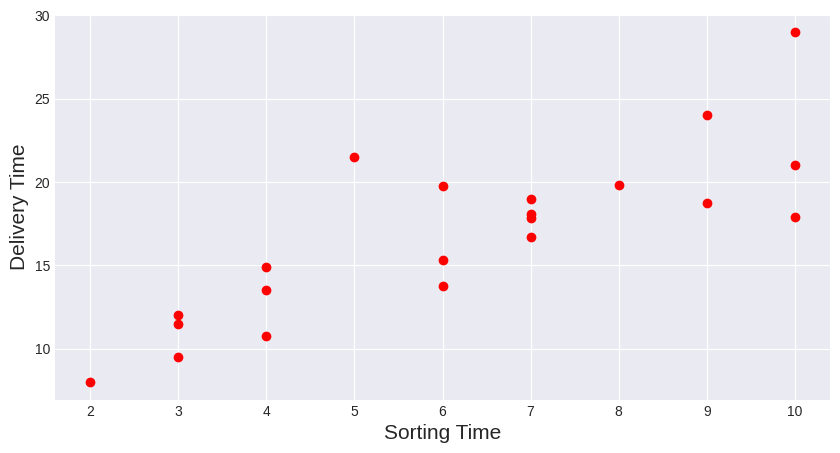

In [9]:
plt.figure(figsize=(10,5))
plt.style.use("seaborn-darkgrid")
plt.scatter(x,y,color="r")
plt.xlabel("Sorting Time",size=15)
plt.ylabel("Delivery Time",size=15)

<ipython-input-38-a22c56681e08>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)
<ipython-input-38-a22c56681e08>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


Text(0.5, 1.0, 'Distribution of Delivery Time')

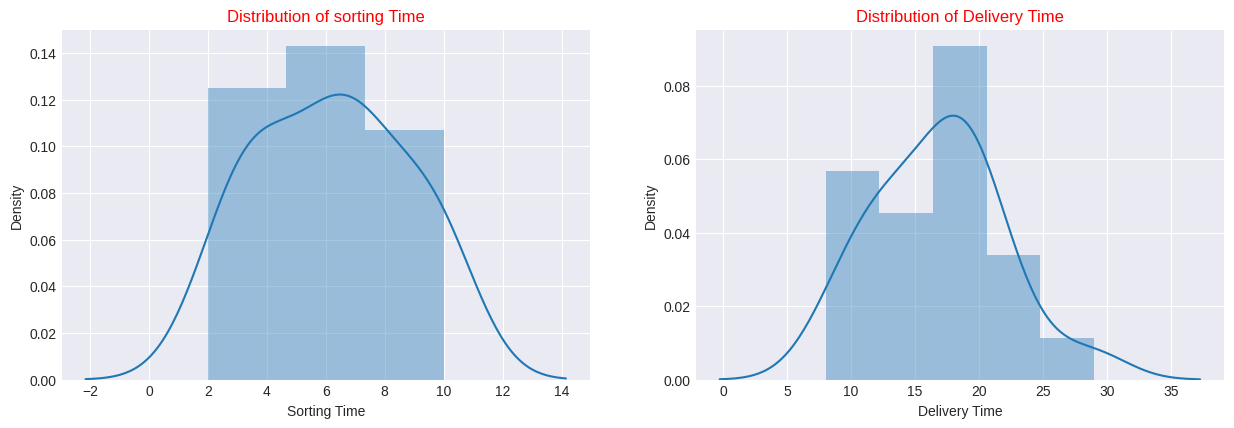

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(x)
plt.title("Distribution of sorting Time",color="red")

plt.subplot(2,2,2)
sns.distplot(y)
plt.title("Distribution of Delivery Time",color="red")

<ipython-input-41-b5665bdc8a7f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,hist=False,color="r")
<ipython-input-41-b5665bdc8a7f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,hist=False,color="r")


Text(0.5, 1.0, 'Distribution of Delivery Time')

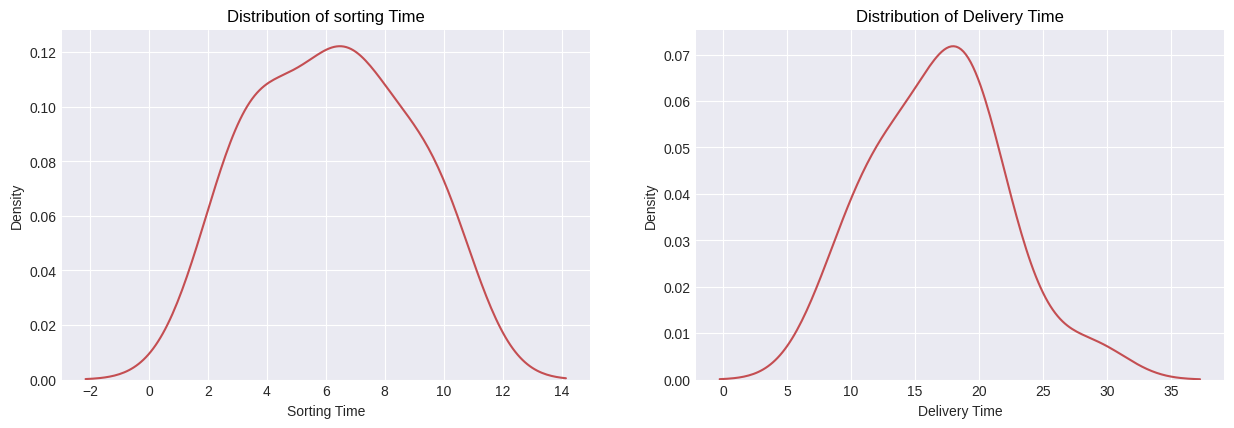

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(x,hist=False,color="r")
plt.title("Distribution of sorting Time",color="black")

plt.subplot(2,2,2)
sns.distplot(y,hist=False,color="r")
plt.title("Distribution of Delivery Time",color="black")

Text(0.5, 1.0, 'co-relation Matrix')

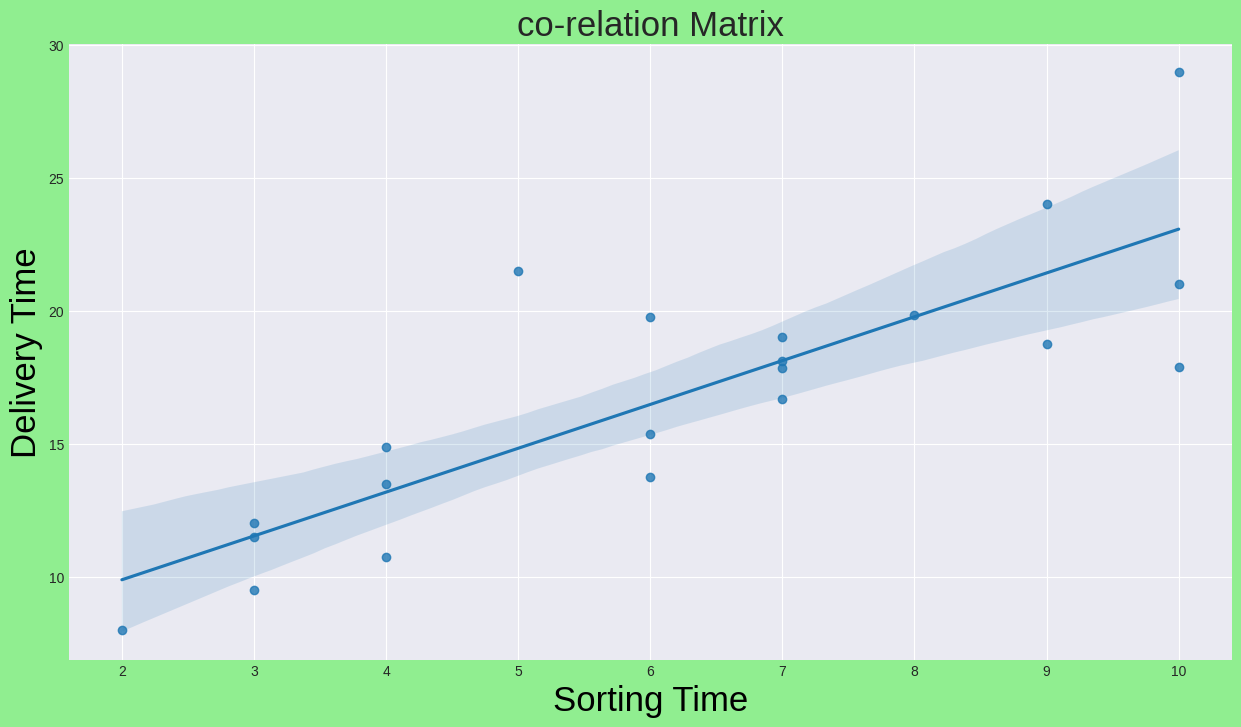

In [51]:

plt.figure(figsize=(15,8),facecolor="lightgreen")
sns.regplot(x=x,y=y,data=data)
plt.xlabel("Sorting Time",size=25,color="black")
plt.ylabel("Delivery Time",size=25,color="black")
plt.title("co-relation Matrix",size=25)

In [53]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [54]:
model = smf.ols("y~x",data=data).fit()


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        14:16:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

USING TRANSFORMATION  FOR INCREASE R_SQUARED VALUE

In [59]:
model = smf.ols("np.log(y)~x+pow(x,2)",data=data).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           2.20e-06
Time:                        14:19:58   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
x              0.2659      0.080      3.315      0.004       0.097       0.434
pow(x, 2)     -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
y_hat=model.predict()
y_hat
#y_hat=model.fittedvalues


array([3.07486324, 2.55794231, 2.8329741 , 3.05291276, 3.07486324,
       2.8329741 , 2.9319682 , 2.38190461, 3.07486324, 3.05291276,
       3.00528108, 2.55794231, 2.9319682 , 2.38190461, 2.38190461,
       2.55794231, 2.8329741 , 2.9319682 , 2.1801857 , 2.9319682 ,
       2.70829881])

Text(0, 0.5, 'Delivery Time')

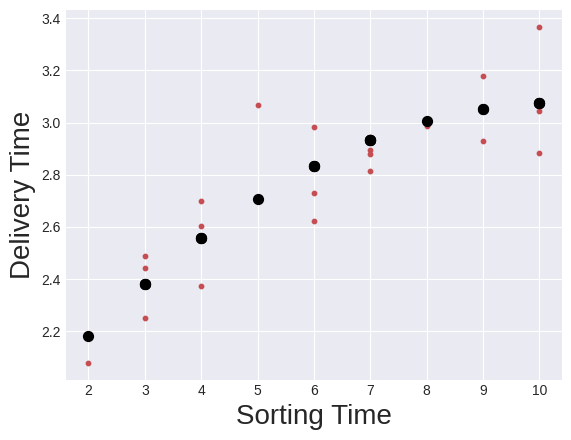

In [77]:
plt.scatter(x,np.log(y),color="r",s=10)
plt.scatter(x,y_hat,color="black",s=50)
plt.xlabel("Sorting Time",size=20)
plt.ylabel("Delivery Time",size=20)


Qustion No 2

In [79]:
from google.colab import files
uploded = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [80]:
salary=pd.read_csv("Salary_Data.csv")

In [81]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [82]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [83]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0, 0.5, 'Salary')

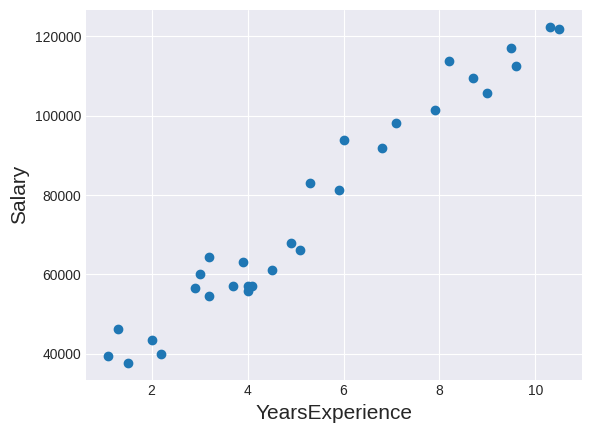

In [88]:
plt.scatter(salary["YearsExperience"],salary["Salary"])
plt.xlabel("YearsExperience",size=15)
plt.ylabel("Salary",size=15)

In [89]:
x=salary["YearsExperience"]
y=salary["Salary"]

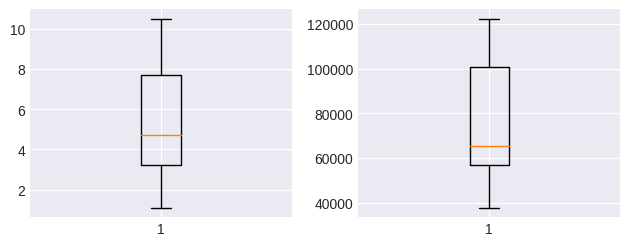

In [105]:
plt.subplot(2,2,1)
plt.boxplot(x)
plt.subplot(2,2,2)
plt.boxplot(y)
plt.tight_layout()

<ipython-input-103-479bb12d4bdd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)
<ipython-input-103-479bb12d4bdd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


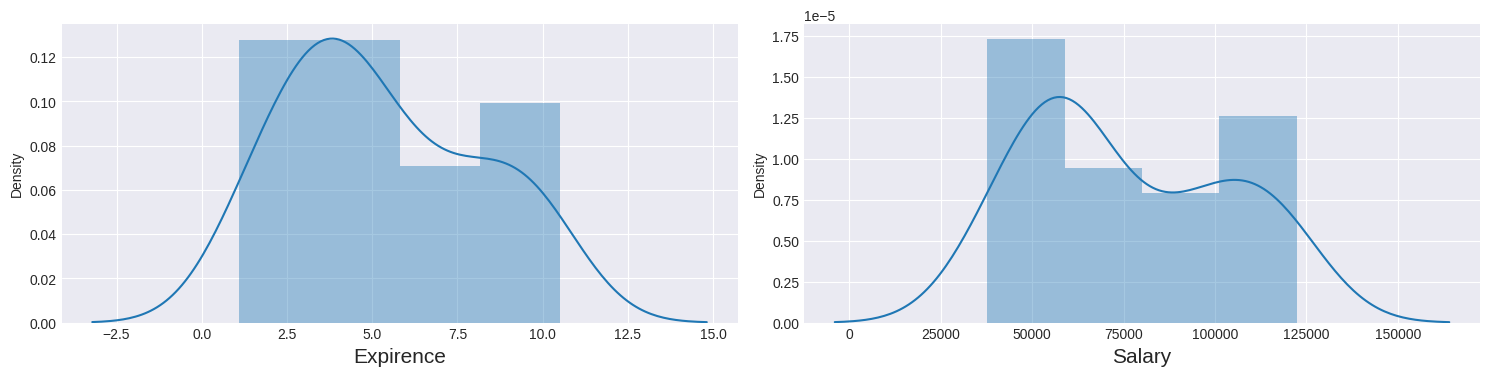

In [103]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(x)
plt.xlabel("Expirence",size=15)
plt.subplot(2,2,2)
sns.distplot(y)
plt.xlabel("Salary",size=15)
plt.tight_layout()



In [117]:
model = smf.ols("y~x",data=salary).fit()

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        15:00:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

USING TRANSFORMATION METHOD

In [136]:
model1 = smf.ols("np.log(y)~x+pow(x,2)",data=salary).fit()

In [137]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           3.95e-18
Time:                        15:09:49   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
x              0.2024      0.027      7.601      0.000       0.148       0.257
pow(x, 2)     -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
model2 = smf.ols("np.log(y)~x",data=salary).fit()

In [140]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           7.03e-18
Time:                        15:16:11   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
x              0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
# RAW MODEL R-SQUARED VALUE IS 0.957 IS GOOD ENOUGH

In [142]:
model.fittedvalues

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

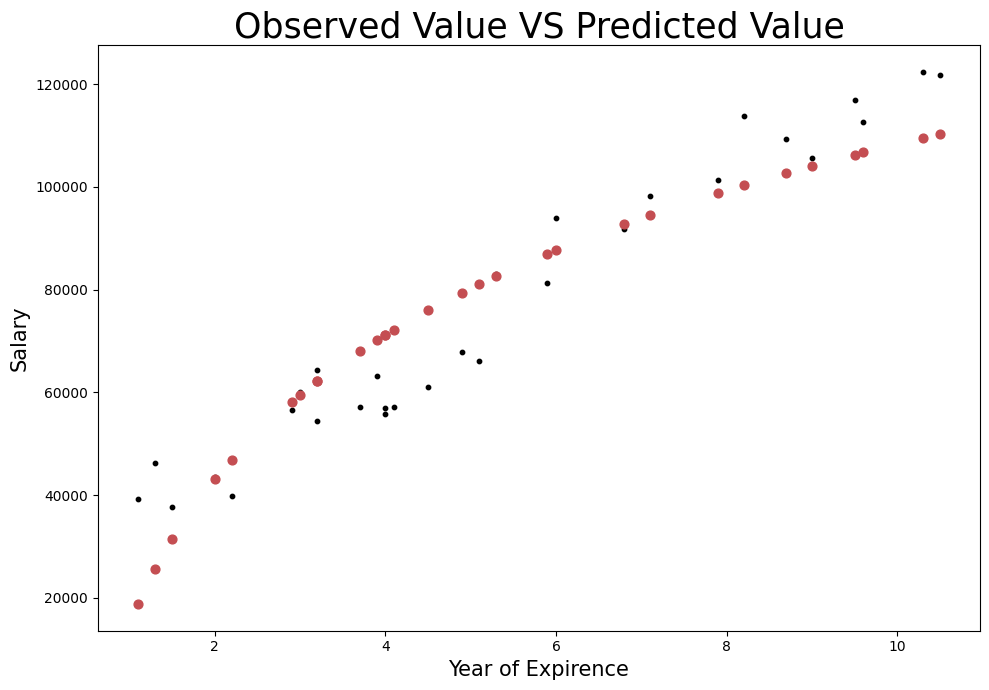

In [155]:
plt.figure(figsize=(10,7))
plt.style.use("default")
plt.scatter(x,y,s=10,color="black")
plt.scatter(x,model.fittedvalues,s=40,color="r")
plt.xlabel("Year of Expirence",size=15)
plt.ylabel("Salary",size=15)
plt.title("Observed Value VS Predicted Value",size=25)
plt.tight_layout()
